# STAT 542 - Statistical Learning

# Homework 6 - Manan Mehta (mananm2)

## Due: 10/05/2020

## About HW6

This is a relatively light homework. The main purpose is to understand how the spline basis is constructed. We will use the `Ozone` data. Univariate analysis is considered in Q1a, while multivariate analysis is considered in Q1b.

In [1]:
#Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as MAE

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

## Question 1 (100 Points) Write Your Own Spline Basis

We will fit and compare different spline models to the `Ozone` dataset. The dataset is already ordered by date, and we will use this index as the $x$ variable, named as `time`.

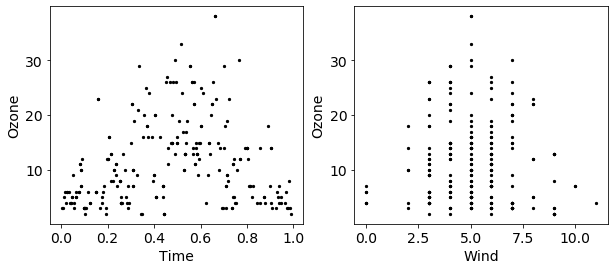

In [2]:
#We could not find the Ozone dataset (the same as the mlbench R package) online.
#Hence we took the following code from R and converted "mydata" to "mydata.csv" to use in Python
'''
library(mlbench)
data(Ozone)
mydata = data.frame("time" = seq(1:nrow(Ozone))/nrow(Ozone), "ozone" = Ozone$V4, "wind" = Ozone$V6)

write.csv(mydata, "mydata.csv")

'''
mydata = pd.read_csv("mydata.csv").dropna()
np.random.seed(5)
trainid = np.random.randint(0, len(mydata), 250)
traindf, testdf = mydata.iloc[trainid] , mydata[~mydata.index.isin(trainid)]

traindf = traindf.sort_values('time')

fig, axarr = plt.subplots(1,2,figsize = (10,4))
ax1, ax2 = axarr[0], axarr[1]
ax1.scatter(traindf['time'], traindf['ozone'], s = 5, color = 'black')
ax1.set_xlabel('Time')
ax1.set_ylabel('Ozone')
ax2.scatter(traindf['wind'], traindf['ozone'], s = 5, color = 'black')
ax2.set_xlabel('Wind')
ax2.set_ylabel('Ozone')
plt.show()

## a. (80 Points) Univariate Spline Fit

Let's consider several different spline methods to model the `ozone` level using `time`. To test your model, use the train/test split provided above. If you use Python, please generate your split with the same mechanism and save your seed. Use the mean squared error as the metric for evaluation and report it for each method. For the basis that you write with your own code, make sure to include the intercept term. For each method, produce a figure consists of training data, testing data and your fitted curve.

  (i) Write your own code (you cannot use `bs()` or similar functions) to implement a continuous piecewise linear fitting. Pick 3 knots using your own judgment.
  
  (ii) Write your own code to implement a quadratic spline fitting. Your spline should be continuous up to the first derivative. Pick 4 knots using your own judgment.
  
  (iii) Produce a same set of basis as (ii) using the `bs()` function. Note that they do not have to be exactly the same as yours. Verify (figure out how) that the column spaces are the same. 
  
  (iv) Use existing functions (e.g. `ns()`)to implement a natural cubic spline with 6 knots. Choose your own knots.
  
  (v) Use existing functions to implement a smoothing spline. Use the built-in generalized cross-validation method to select the best tuning parameter. 

In [3]:
#Write general functions for tasks (i) and (ii)

def generate_basis(xtrain, degree, knots):
    '''
    Function to generate the basis X given the training x,
    degree and knots
    
    '''
    df = len(knots) + degree + 1
    
    X = np.zeros(( len(xtrain) , df ))
    
    for i in range(df):
        if i < (degree+1):
            X[:, i] = xtrain ** i
        
        else:
            idxmap = (xtrain > knots[i-(degree+1)])
            X[idxmap, i] = (xtrain[idxmap] - knots[i-(degree+1)]) ** degree
    
    return X


def fit_spline(xtrain, ytrain, degree, knots):
    '''
    Function to fit a piecewise continuous spline
    of degree 1 or 2 and continuous upto (n-1)th derivative
    based on the given knots
    
    xtrain must be sorted
    
    Returns the fitted spline yfit, the constructed basis X and parameters beta
    
    (DOES NOT OPTIMIZE FOR RSS)
    
    '''
    
    nregions = len(knots) + 1
    
    X = generate_basis(xtrain, degree, knots)
        
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(ytrain))

    return X.dot(beta), X, beta

### Continuous Piecewise Linear Fit

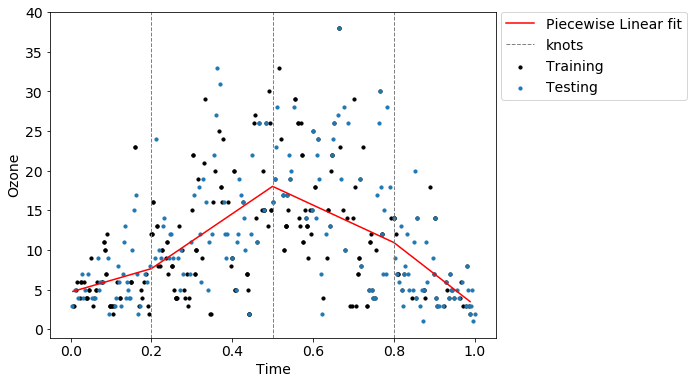

Training Error = 40.42
Testing Error = 37.30


In [4]:
knots = [0.2, 0.5, 0.8]
degree = 1

yfit, Xtrain, beta = fit_spline(traindf['time'], traindf['ozone'], degree, knots)

plt.figure(figsize = (8,6))
plt.scatter(traindf['time'], traindf['ozone'], s = 10, color = 'black', marker = 'o', label = 'Training')
plt.scatter(testdf['time'], testdf['ozone'], s = 10, marker = 'o', label = 'Testing')
plt.plot(traindf['time'] , yfit, color = 'red', label = 'Piecewise Linear fit')
plt.axvline(knots[0], ls = '--', color = 'gray', label = 'knots', lw = 1)
for knot in knots[1:]:
    plt.axvline(knot, ls = '--', color = 'gray', lw = 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.show()

training_error = MAE(yfit, traindf['ozone'])
Xtest = generate_basis(testdf['time'], degree, knots)
testing_error = MAE(Xtest.dot(beta) , testdf['ozone'])
print('Training Error = {:.2f}'.format(training_error))
print('Testing Error = {:.2f}'.format(testing_error))

### Quadratic Spline Fit (1st derivative continuity):

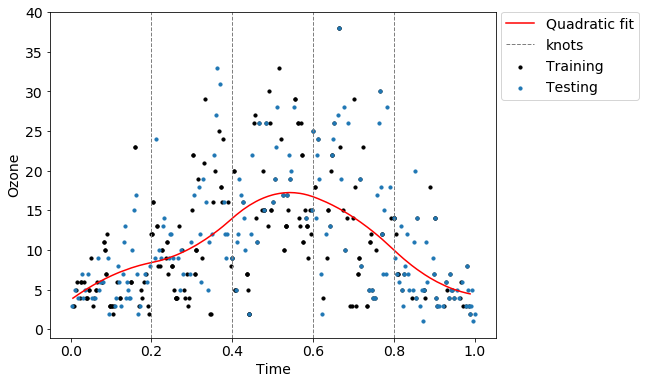

Training Error = 40.04
Testing Error = 36.93


In [5]:
knots = [0.2, 0.4, 0.6, 0.8]
degree = 2

yfit, Xtrain, beta = fit_spline(traindf['time'], traindf['ozone'], degree, knots)

plt.figure(figsize = (8,6))
plt.scatter(traindf['time'], traindf['ozone'], s = 10, color = 'black', marker = 'o', label = 'Training')
plt.scatter(testdf['time'], testdf['ozone'], s = 10, marker = 'o', label = 'Testing')
plt.plot(traindf['time'] , yfit, color = 'red', label = 'Quadratic fit')
plt.axvline(knots[0], ls = '--', color = 'gray', label = 'knots', lw = 1)
for knot in knots[1:]:
    plt.axvline(knot, ls = '--', color = 'gray', lw = 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.show()

training_error = MAE(yfit, traindf['ozone'])
Xtest = generate_basis(testdf['time'], degree, knots)
testing_error = MAE(Xtest.dot(beta) , testdf['ozone'])
print('Training Error = {:.2f}'.format(training_error))
print('Testing Error = {:.2f}'.format(testing_error))

### Use of inbuilt basis generating function for the quadratic spline

In [6]:
import patsy
Xtrain_python = patsy.bs(traindf['time'], knots = knots, degree=2, include_intercept=True).values

myBasis = Xtrain
pyBasis = Xtrain_python

#Check if each basis vector in our basis can be written as a linear combination of the Python basis
RSS1 = []
for i in range(myBasis.shape[1]):
    y = myBasis[:,i]
    RSS1.append(np.linalg.norm(y - pyBasis.dot(np.linalg.inv(pyBasis.T.dot(pyBasis)).dot(pyBasis.T.dot(y)))))
print(np.round(RSS1,8))


#Check if each basis vector in Python basis can be written as a linear combination of our basis
RSS2 = []
for i in range(pyBasis.shape[1]):
    y = pyBasis[:,i]
    RSS2.append(np.linalg.norm(y - myBasis.dot(np.linalg.inv(myBasis.T.dot(myBasis)).dot(myBasis.T.dot(y)))))
print(np.round(RSS2,8))

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]


We see that the RSS= 0 when we fit each basis vector with the other basis, which means that each basis vector from our basis can be written as a linear combination of the one generated by Python. The same is true for the Python generated basis vectors when written as linear combination of our basis. We can thus infer that both basis have the same column space.

### Natural Cubic Spline

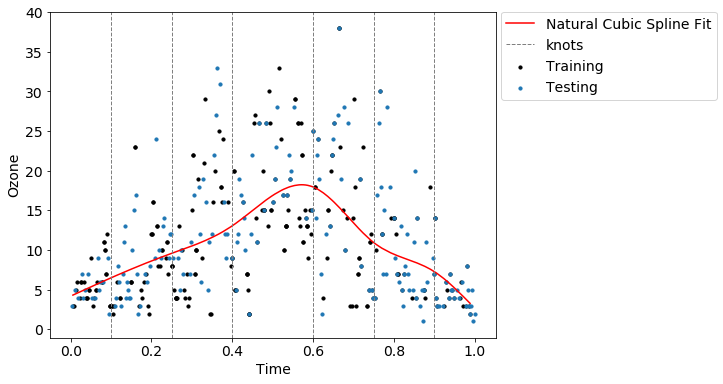

In [7]:
knots = [0.1,0.25,0.4,0.6,0.75,0.9]
X_cr = patsy.cr(traindf['time'], knots = knots).values
beta_fit = np.linalg.inv(X_cr.T.dot(X_cr)).dot(X_cr.T.dot(traindf['ozone']))

plt.figure(figsize = (8,6))
plt.scatter(traindf['time'], traindf['ozone'], s = 10, color = 'black', marker = 'o', label = 'Training')
plt.scatter(testdf['time'], testdf['ozone'], s = 10, marker = 'o', label = 'Testing')
plt.plot(traindf['time'] , X_cr.dot(beta_fit), color = 'red', label = 'Natural Cubic Spline Fit')
plt.axvline(knots[0], ls = '--', color = 'gray', label = 'knots', lw = 1)
for knot in knots[1:]:
    plt.axvline(knot, ls = '--', color = 'gray', lw = 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.show()

### Smoothing Spline

A function equivalent of the `smooth.spline` from `R` is not available in Python. Thus, this analysis was done in R using the following code:

`sp = smooth.spline(train$time , train$ozone, cv = FALSE)  #cv = FALSE gives GCV`

`plot(train$time, train$ozone, pch = 19, cex = 0.5)`

`lines(sp, col = "red" , lw = 2)`

`points(test$time, test$ozone, pch = 19, cex = 0.5, col = "blue")`


The figure obtained is included in the final report.

The parameters obtained after the fit were:

Smoothing Parameter  spar= 0.2374191  

lambda= 6.550478e-08 (13 iterations)

Equivalent Degrees of Freedom (Df): 75.03003

Penalized Criterion (RSS): 3061.965

GCV: 236.0771

## b. (20 Points) Multivariate Spline Fit with Additive Structure

Consider using both `time` and `wind` as the covariate. Use the additive model structure, with continuous piecewise linear for time and quadratic spline for wind. Both should be done using the code you developed previously. Pick your number of knots, but no more than 5. Fit and predict the `ozone` outcome and report the prediction error.

In [8]:
from sklearn.linear_model import LinearRegression
#We first get the spline basis from both - time (linear) and wind (quadratic)

knots_time = [0.2, 0.5, 0.8]
knots_wind = [3, 5, 7]

X_time = generate_basis(traindf['time'], 1, knots_time)
X_wind = generate_basis(traindf['wind'], 2, knots_wind)

#merge the 2 bases
X_mtv = np.append(X_time, X_wind, axis = 1)

#Fit a linear regression on the combined basis
reg = LinearRegression().fit(X_mtv, traindf['ozone'])

X_time_test = generate_basis(testdf['time'], 1, knots_time)
X_wind_test = generate_basis(testdf['wind'], 2, knots_wind)
X_mtv_test = np.append(X_time_test, X_wind_test, axis = 1)

#Predict the test points
y_predicted = reg.predict(X_mtv_test)

#Find and print the testing error
testing_error = MAE(y_predicted, testdf['ozone'])
print("The prediction error is {:.2f}".format(testing_error))

The prediction error is 35.11
